In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import nasdaqdatalink
import os
from dotenv import load_dotenv

In [3]:
nasdaqdatalink.ApiConfig.api_key = "jZh4kTZdBvtrnEN-rdyz"

In [4]:
gdp_data = nasdaqdatalink.get("FRED/GDP")
gdp_data /= 1000
gdp_data.rename(columns = {"Value": "GDP"}, inplace = True)
    
cpi_data = nasdaqdatalink.get("FRED/CPIAUCSL")
cpi_data.rename(columns = {"Value": "Inflation"}, inplace = True)
    
econ_data = pd.concat([gdp_data, cpi_data], axis = 1)

econ_data.dropna(inplace = True)
econ_data

,GDP,Inflation
Date,,
1947-01-01,0.243164,21.480
1947-04-01,0.245968,22.000
1947-07-01,0.249585,22.230
1947-10-01,0.259745,22.910
1948-01-01,0.265742,23.680
...,...,...
2020-10-01,21.477597,260.352
2021-01-01,22.038226,262.200
2021-04-01,22.740959,266.727


In [5]:
econ_data["Inflation_Growth"] = econ_data["Inflation"].pct_change()
econ_data["GDP_Growth"] = econ_data["GDP"].pct_change()

econ_data.dropna(inplace = True)

#Calculate the 1st derivative of economic data
econ_data["Speed_of_Inflation_Growth"] = econ_data["Inflation_Growth"].pct_change()
econ_data["Speed_of_GDP_Growth"] = econ_data["GDP_Growth"].pct_change()

econ_data.replace([np.inf, -np.inf], 0, inplace = True)

#Display economic data
display(econ_data)

,GDP,Inflation,Inflation_Growth,GDP_Growth,Speed_of_Inflation_Growth,Speed_of_GDP_Growth
Date,,,,,,
1947-04-01,0.245968,22.000,0.024209,0.011531,NaN,NaN
1947-07-01,0.249585,22.230,0.010455,0.014705,-0.568147,0.275238
1947-10-01,0.259745,22.910,0.030589,0.040708,1.925932,1.768250
1948-01-01,0.265742,23.680,0.033610,0.023088,0.098743,-0.432832
1948-04-01,0.272567,23.820,0.005912,0.025683,-0.824094,0.112386
...,...,...,...,...,...,...
2020-10-01,21.477597,260.352,0.006997,0.016038,-0.268328,-0.811946
2021-01-01,22.038226,262.200,0.007098,0.026103,0.014461,0.627558
2021-04-01,22.740959,266.727,0.017265,0.031887,1.432410,0.221585


In [7]:
for index, row in econ_data.iterrows():
    if (econ_data.loc[index, 'Speed_of_GDP_Growth'] < 0 and econ_data.loc[index, 'Speed_of_Inflation_Growth'] < 0):
        econ_data.loc[index, 'stageindex'] = 1
        econ_data.loc[index, 'stage'] = 'Reflation'
    if (econ_data.loc[index, 'Speed_of_GDP_Growth'] > 0 and econ_data.loc[index, 'Speed_of_Inflation_Growth'] < 0):
        econ_data.loc[index, 'stageindex'] = 2
        econ_data.loc[index, 'stage'] = 'Recovery'
    if (econ_data.loc[index, 'Speed_of_GDP_Growth'] > 0 and econ_data.loc[index, 'Speed_of_Inflation_Growth'] > 0):
        econ_data.loc[index, 'stageindex'] = 3
        econ_data.loc[index, 'stage'] = 'Overheat'
    if (econ_data.loc[index, 'Speed_of_GDP_Growth'] < 0 and econ_data.loc[index, 'Speed_of_Inflation_Growth'] > 0):
        econ_data.loc[index, 'stageindex'] = 4
        econ_data.loc[index, 'stage'] = 'Stagflation'
        
econ_data.dropna(inplace = True)
print(econ_data["stageindex"].unique())

[2. 3. 4. 1.]


<AxesSubplot:xlabel='Date'>

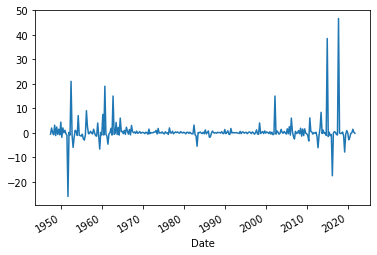

In [9]:
econ_data["Speed_of_Inflation_Growth"].plot()